<a href="https://colab.research.google.com/github/RyoNaruse/aiuaiu/blob/master/AI_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. githubリポジトリ内のjupyter notebookを開く
2. URLの”https://github.com" を ”https://colab.research.google.com/github” に置き換えてEnter。

～～～～～プログラミングのキホンのキ～～～～～

In [1]:
#変数に値を代入してみよう！
#変数の中身を表示してみよう！
x = 3
print(x)
print(type(x))

3
<class 'int'>


In [2]:
y = 0.5
print(y)
print(type(y))

0.5
<class 'float'>


In [0]:
#関数を作ってみよう！
def nijou(a):
    result = a * a
    print(a)
    print(type(a))
    print(result)
    return result

In [4]:
#関数を実行してみよう
y = nijou(5)

5
<class 'int'>
25


In [5]:
print(y)

25


In [6]:
#キーボードから入力を取得するinput関数を使う
a = int(input())
print(nijou(a))

7
7
<class 'int'>
49
49


～～～～～手書き文字分類～～～～～

In [0]:
#①データのダウンロード
from sklearn import  datasets
mnist = datasets.load_digits()

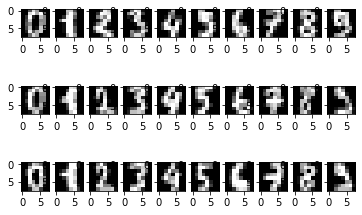

In [38]:
#②データの確認
import matplotlib.pyplot as plt

for i in range(30):
    plt.subplot(3,10,i+1)
    plt.imshow(mnist.images[i],'gray')
plt.show()

(1797, 8, 8)


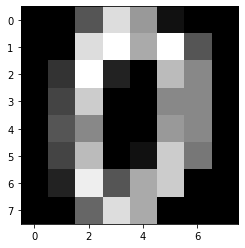

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [52]:
print(mnist.images.shape)

plt.subplot(1,1,1)  
plt.imshow(mnist.images[0],'gray')  #画像として表示
plt.show()

print(mnist.images[0])  #行列として表示

In [53]:
print(mnist.data[0])   #横に並べた配列として表示

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [54]:
print(mnist.target)

[0 1 2 ... 8 9 8]


In [0]:
#③k-means法でデータを分類してみる
from sklearn.cluster import KMeans

In [0]:
model = KMeans(n_clusters=10)   #与えたデータを10個に分ける機械を作成

In [57]:
model.fit(mnist.data)   #分類を実行

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [58]:
print(model.cluster_centers_)   #各クラスターの中心を配列で表示

[[ 0.00000000e+00 -1.16573418e-15  1.15934066e+00  1.12252747e+01
   9.53296703e+00  1.41758242e+00  5.49450549e-03 -3.05311332e-16
  -2.51534904e-17  6.04395604e-02  7.18131868e+00  1.45604396e+01
   6.19230769e+00  8.29670330e-01  2.74725275e-02  3.74700271e-16
  -1.25767452e-17  7.69230769e-01  1.24560440e+01  9.47252747e+00
   9.34065934e-01  1.09890110e-01  0.00000000e+00  4.16333634e-17
  -3.03576608e-18  2.29670330e+00  1.36208791e+01  8.09340659e+00
   3.87362637e+00  1.92857143e+00  1.04395604e-01 -6.07153217e-18
   0.00000000e+00  3.52747253e+00  1.46758242e+01  1.29175824e+01
   1.22527473e+01  1.02857143e+01  2.71978022e+00  0.00000000e+00
  -2.42861287e-17  1.86813187e+00  1.45164835e+01  1.06538462e+01
   5.57692308e+00  1.01923077e+01  9.13186813e+00  2.30769231e-01
  -2.42861287e-17  1.75824176e-01  1.02857143e+01  1.26263736e+01
   5.41758242e+00  1.13241758e+01  1.08956044e+01  6.26373626e-01
  -1.51788304e-18 -6.10622664e-16  1.44505495e+00  1.07362637e+01
   1.50989

～～～～～分類結果の考察～～～～～

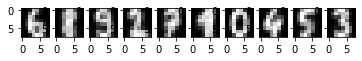

In [59]:
#①重心の画像を表示する
centers = model.cluster_centers_.reshape(10,8,8)    #各クラスターの中心を画像の形に変換

for i in range(10): 
    plt.subplot(1,10,i+1)
    plt.imshow(centers[i],'gray')
plt.show()


In [60]:
#②「どの数字がどのグループに割り振られたか」を表にしてみる
import numpy as np      

label = np.zeros((10,10), 'int')    #10行10列のゼロ行列を作る

for i in range(len(mnist.target)):  #データをはじめからみていき、「正解の数字」と「分類されたグループ」に対応する表の位置に１を加算する。
    label[mnist.target[i], model.labels_[i]] += 1
    
print(label)

[[  0   0   0   0   0   0 177   1   0   0]
 [  2  99   0  24   0  55   0   0   1   1]
 [  0   8   2 148   2   3   1   0   0  13]
 [  0   7   9   1   7   0   0   0   2 157]
 [  0   3   0   0   8   7   0 163   0   0]
 [  1   0  42   0   0   0   0   2 136   1]
 [177   2   0   0   0   1   1   0   0   0]
 [  0   2   0   0 168   4   0   0   5   0]
 [  2 104  46   3   3   8   0   0   4   4]
 [  0   2 138   0   7  20   0   0   6   7]]


～～～～～番外編　教師有り学習で手書き文字を当てる～～～～～

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [62]:
#データを学習に使うものと、予測に使うものに分ける
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, train_size=0.5)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(898, 64)
(899, 64)
(898,)
(899,)


In [63]:
#分類器を作成して、データとその答えを学習させる
kn_model = KNeighborsClassifier(n_neighbors=5)
kn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [64]:
#行番号が正解ラベル、列番号が分類器の予想ラベル
print(confusion_matrix(y_test, kn_model.predict(x_test)))

[[81  0  0  0  0  0  0  0  0  0]
 [ 0 94  0  0  0  0  0  0  0  0]
 [ 0  2 92  0  0  0  0  0  2  0]
 [ 0  0  1 91  0  0  0  1  0  0]
 [ 0  0  0  0 80  0  0  1  1  0]
 [ 0  0  0  0  0 85  1  0  0  1]
 [ 2  1  0  0  0  0 95  0  0  0]
 [ 0  0  0  0  0  0  0 76  0  1]
 [ 0  4  0  1  0  0  0  1 82  2]
 [ 0  8  0  0  3  1  0  2  0 87]]
